<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/KNN_Project_Data')

In [6]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


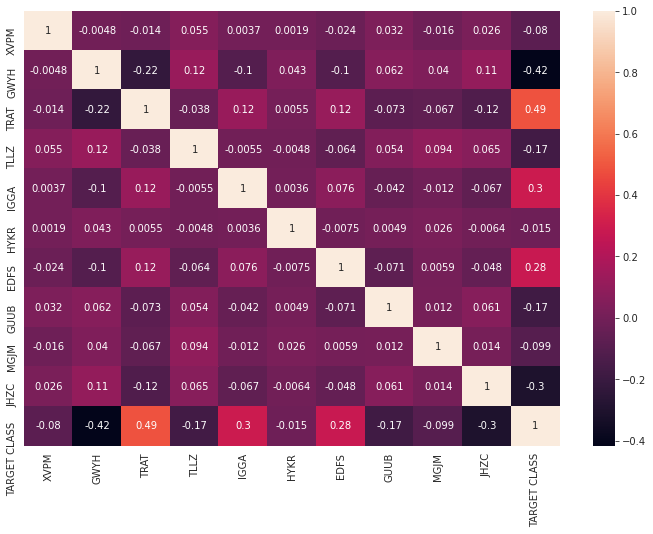

In [10]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.heatmap(df.corr(),annot=True)

In [18]:
# sns.pairplot(df,hue='TARGET CLASS')

#The main catch in KNN is that since the method is Position based, we gotta make sure we do the appropriate FeatureScaling otherwise some features will be far off due to their magnitudes. 

In [13]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


##Splitting and Training.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##Using **KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

##Predictions and Evaluations

In [22]:
y_p = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:

print(confusion_matrix(y_test,y_p))


[[109  37]
 [ 40 114]]


In [26]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       146
           1       0.75      0.74      0.75       154

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [27]:
#Pretty low scores. Let's optimize the scene.

#Picking a K-Value (No. Of Neighbours)

In [28]:

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

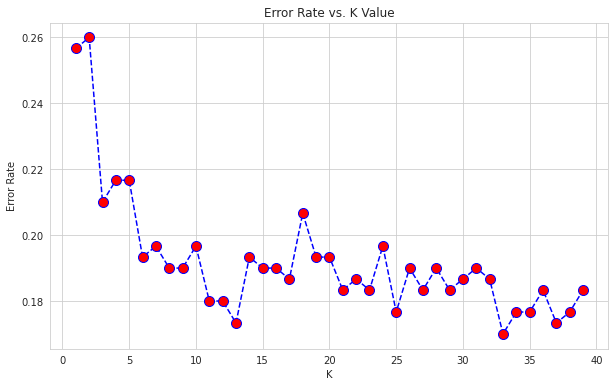

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looks Like K = 32 gives the minimum error.

In [30]:
# NOW WITH K=32
knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[124  22]
 [ 34 120]]


              precision    recall  f1-score   support

           0       0.78      0.85      0.82       146
           1       0.85      0.78      0.81       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [31]:
#Improved Scores.